<a href="https://colab.research.google.com/github/Rudrajit12/ML_Projects/blob/main/Regression_Boston_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of regression models.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
print("Type of boston dataset :", type(boston_data))

Type of boston dataset : <class 'sklearn.utils.Bunch'>


In [3]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
# description of the dataset
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# loading the dataset into a dataframe
boston_df = pd.DataFrame(boston_data['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# adding the column names
boston_df.columns = boston_data['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# adding the dependent variable
boston_df['MEDV'] = boston_data['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# find missing values
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values present in the dataset.

In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **Data Preparation:**

In [11]:
# create the set of dependent and independent variables
dependent_variable = 'MEDV'
independent_variables = list(set(boston_df.columns.tolist()) - {dependent_variable})
print(dependent_variable)
print(independent_variables)

X = boston_df[independent_variables]
Y = boston_df[dependent_variable]

MEDV
['ZN', 'NOX', 'AGE', 'INDUS', 'DIS', 'RM', 'B', 'PTRATIO', 'CHAS', 'LSTAT', 'TAX', 'RAD', 'CRIM']


### **Evaluation Metrics:**

In [69]:
# func to evaluate metrics
def print_metrics(actual, predicted):
  MSE = mean_squared_error(actual, predicted)
  RMSE = math.sqrt(mean_squared_error(actual, predicted))
  R2 = r2_score(actual, predicted)
  Adj_R2 = 1 - (((len(actual) - 1)/(len(actual) - len(independent_variables) - 1)) * (1 - r2_score(actual, predicted)))

  print('MSE is {}'.format(MSE))
  print('RMSE is {}'.format(RMSE))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 score is {}'.format(R2))
  print('Adjusted R2 score is {}'.format(Adj_R2))

  return MSE, RMSE, R2, Adj_R2

### **Building a Linear Regression Model:**

In [83]:
# create a function for linear regression
def linear_regression(X,Y):

  # split the dataset into train and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

  # transforming the data
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Fitting Linear Regression to the training set
  regressor = LinearRegression()
  regressor.fit(X_train, Y_train)

  # predictions after modeling
  Y_train_pred = regressor.predict(X_train)
  Y_test_pred = regressor.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  lr = print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

  return lr

In [86]:
# run the model
lr = linear_regression(X,Y)

Train Set Metrics: 

MSE is 19.958219814238046
RMSE is 4.4674623461466405
MAE is 3.1036061039080045
MAPE is 15.214231360471286
R2 score is 0.7645451026942549
Adjusted R2 score is 0.7555424154443293


Test Set Metrics: 

MSE is 27.195965766883198
RMSE is 5.214975145375402
MAE is 3.6099040603818118
MAPE is 18.118047288424034
R2 score is 0.6733825506400196
Adjusted R2 score is 0.642614240193065
---------------------------


In [88]:
# metrics for linear regression
lr_mse = lr[0]
lr_rmse = lr[1]
lr_r2 = lr[2]
lr_adj_r2 = lr[3]

### **Building a Decision Tree Regressor:**

In [89]:
# create a function for DTRegressor
def decision_tree(X,Y):

  # split the data into train and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33, random_state= 0)

  # fitting the decision tree regressor model
  dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth = 5, max_leaf_nodes = 9, random_state = 0)
  dt_regressor.fit(X_train, Y_train)

  # predictions after modeling
  Y_train_pred = dt_regressor.predict(X_train)
  Y_test_pred = dt_regressor.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  dt = print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

  return dt

In [90]:
# run the model
dt = decision_tree(X,Y)

Train Set Metrics: 

MSE is 11.13674209478488
RMSE is 3.3371757662408013
MAE is 2.5307995344206944
MAPE is 13.700514983985126
R2 score is 0.8705620280883256
Adjusted R2 score is 0.8653845092118586


Test Set Metrics: 

MSE is 24.09249926761781
RMSE is 4.908411073618204
MAE is 3.214500129581584
MAPE is 16.46784110925029
R2 score is 0.701167697575638
Adjusted R2 score is 0.6757767176310845
---------------------------


In [91]:
# metrics for decision tree regressor
dt_mse = dt[0]
dt_rmse = dt[1]
dt_r2 = dt[2]
dt_adj_r2 = dt[3]

In [17]:
# create a function for DTRegressor
def decision_tree(X,Y):

  # split the data into train and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33, random_state= 0)

  # hyperparameters
  param_dict = {'max_depth': [1,2,3,4,5,6,7],
                'max_leaf_nodes': [3,5,9]}

  # fitting the decision tree regressor model
  dt_regressor = DecisionTreeRegressor()
  dt_model = RandomizedSearchCV(estimator = dt_regressor, 
                                param_distributions = param_dict, 
                                cv = 5, verbose = 2, scoring = 'neg_mean_squared_error')
  dt_model.fit(X_train, Y_train)

  print(dt_model.best_estimator_)
  dt_optimal_model = dt_model.best_estimator_
  print(dt_model.best_params_)

  # predictions after modeling
  Y_train_pred = dt_optimal_model.predict(X_train)
  Y_test_pred = dt_optimal_model.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

In [18]:
# run the model
decision_tree(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=4, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=4, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=4, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=4, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=4, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=5, max_leaf_nodes=5; total time=   0.0s
[CV] END ......................max_depth=5, max_

### **Building a Random Forest Regressor:**

In [92]:
# create a random forest model
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

  # number of trees
  n_estimators = [100,150]

  # max depth of trees
  max_depth = [1,2,3,4,5,6,7,8,9]

  # max no of leaf nodes
  max_leaf_nodes = [3,5,9]

  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'max_leaf_nodes': max_leaf_nodes}

  # build a random forest model
  rf_model = RandomForestRegressor()

  # Random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # predicitions after modeling
  Y_train_pred = rf_optimal_model.predict(X_train)
  Y_test_pred = rf_optimal_model.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  rf = print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

  return rf

In [93]:
# run the model
rf = random_forest(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=2, max_leaf_nodes=9, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=2, max_leaf_nodes=9, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=2, max_leaf_nodes=9, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=2, max_leaf_nodes=9, n_estimators=150; total time=   0.4s
[CV] END ....max_depth=2, max_leaf_nodes=9, n_estimators=150; total time=   0.5s
[CV] END ....max_depth=6, max_leaf_nodes=5, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=6, max_leaf_nodes=5, n_es

In [94]:
# metrics for random forest regressor
rf_mse = rf[0]
rf_rmse = rf[1]
rf_r2 = rf[2]
rf_adj_r2 = rf[3]

### **Building a Gradient Boosting Regressor:**

In [95]:
# create a gradient boosting model
def gradient_boosting(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

  # number of trees
  n_estimators = [100]

  # max depth of trees
  max_depth = [5]

  # max no of leaf nodes
  max_leaf_nodes = [6,9]

  # learning rate
  lr = [0.05, 0.02]

  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'max_leaf_nodes': max_leaf_nodes,
              'learning_rate': lr,
              'alpha': [0.9]}

  # build a random forest model
  gb_model = GradientBoostingRegressor()

  # Random search
  gb_grid = RandomizedSearchCV(estimator=gb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')

  gb_grid.fit(X_train,Y_train)

  print(gb_grid.best_estimator_)
  gb_optimal_model = gb_grid.best_estimator_
  print(gb_grid.best_params_)

  # predicitions after modeling
  Y_train_pred = gb_optimal_model.predict(X_train)
  Y_test_pred = gb_optimal_model.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  gb = print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

  return gb

In [96]:
# run the model
gb = gradient_boosting(X,Y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=6, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=6, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=6, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=6, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=6, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.1s
[CV] END alpha=0.9, learning_rate=0.05, max_depth=5, max_leaf_nodes=9, n_est

In [97]:
# metrics for gradient boosting regressor
gb_mse = gb[0]
gb_rmse = gb[1]
gb_r2 = gb[2]
gb_adj_r2 = gb[3]

### **Building a XGBoost Regressor:**

In [98]:
# create a xg boost model
def xg_boost(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

  # number of trees
  n_estimators = [100]

  # max depth of trees
  max_depth = [5]

  # max no of leaf nodes
  max_leaf_nodes = [9]

  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'max_leaf_nodes': max_leaf_nodes}

  # build a random forest model
  xg_model = XGBRegressor()

  # Random search
  xg_grid = RandomizedSearchCV(estimator=xg_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')

  xg_grid.fit(X_train,Y_train)

  print(xg_grid.best_estimator_)
  xg_optimal_model = xg_grid.best_estimator_
  print(xg_grid.best_params_)

  # predicitions after modeling
  Y_train_pred = xg_optimal_model.predict(X_train)
  Y_test_pred = xg_optimal_model.predict(X_test)

  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  xgb = print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

  return xgb

In [99]:
# run the model
xgb = xg_boost(X,Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[18:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ....max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.3s
[18:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ....max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.3s
[18:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ....max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.2s
[18:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ....max_depth=5, max_leaf_nodes=9, n_estimators=100; total time=   0.1s
[18:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

In [100]:
# metrics for XGB regressor
xgb_mse = xgb[0]
xgb_rmse = xgb[1]
xgb_r2 = xgb[2]
xgb_adj_r2 = xgb[3]

### **Summary:**

In [102]:
models = pd.DataFrame(
    {'Models': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
     'MSE': [lr_mse, dt_mse, rf_mse, gb_mse, xgb_mse],
     'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse],
     'R-Squared': [lr_r2, dt_r2, rf_r2, gb_r2, xgb_r2],
     'Adjusted R-Squared': [lr_adj_r2, dt_adj_r2, rf_adj_r2, gb_adj_r2, xgb_adj_r2]}
)
models

,Models,MSE,RMSE,R-Squared,Adjusted R-Squared
0,Linear Regression,27.195966,5.214975,0.673383,0.642614
1,Decision Tree,24.092499,4.908411,0.701168,0.675777
2,Random Forest,16.324868,4.040404,0.797514,0.780309
3,Gradient Boosting,13.278677,3.643992,0.835297,0.821303
4,XGBoost,15.973712,3.996713,0.801869,0.785035


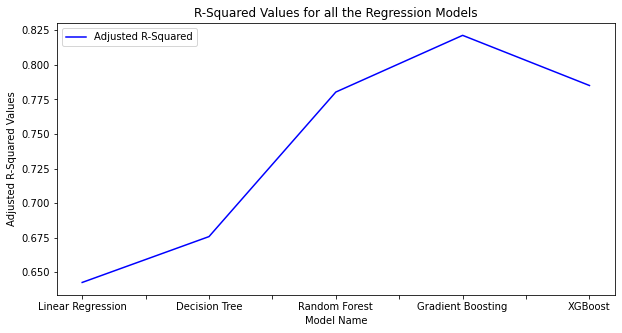

In [110]:
plt.figure(figsize=(10,5))
ax = plt.gca()
models.plot(kind='line', x='Models', y='Adjusted R-Squared', color='blue', ax=ax)
plt.title('R-Squared Values for all the Regression Models')
plt.xlabel('Model Name')
plt.ylabel('Adjusted R-Squared Values')
plt.show()

We have run all the regression models on the Boston Housing Data and found out that Gradient Boosting Regressor works the best among the other regression models.

We can even observe that ensemble methods show a sufficient improvement than the single models but are more complex and not so easy to understand.